In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
url = 'C:/Users/AKINTOLA/Downloads/train_data.csv'
df = pd.read_csv(url)
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [3]:
cat_feat = df.select_dtypes(include = 'object')
cat_feat.head()

,Customer Id,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Geo_Code
0,H14663,N,V,V,U,.,1053
1,H2037,V,N,O,R,4,1053
2,H3802,N,V,V,U,.,1053
3,H3834,V,V,V,U,.,1053
4,H5053,V,N,O,R,3,1053


In [4]:
cat_feat.isna().sum()  / len(cat_feat)

Customer Id         0.000000
Building_Painted    0.000000
Building_Fenced     0.000000
Garden              0.000978
Settlement          0.000000
NumberOfWindows     0.000000
Geo_Code            0.014246
dtype: float64

In [5]:
geo_mode = cat_feat['Geo_Code'].mode()
Garden_mode = cat_feat['Garden'].mode()

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\AKINTOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
cat_feat['Geo_Code'] = np.where(cat_feat['Geo_Code'].isnull(), 0, cat_feat['Geo_Code'].values)
cat_feat['Garden'] = np.where(cat_feat['Garden'].isnull(), 0, cat_feat['Garden'].values)

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\AKINTOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
cat_feat.isna().sum()  / len(cat_feat)

Customer Id         0.0
Building_Painted    0.0
Building_Fenced     0.0
Garden              0.0
Settlement          0.0
NumberOfWindows     0.0
Geo_Code            0.0
dtype: float64

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


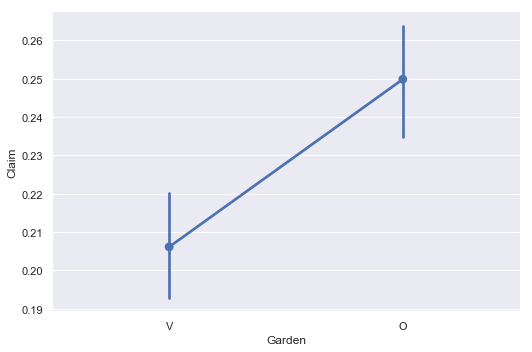

In [12]:
axes = sns.factorplot('Garden','Claim', 
                      data=df, aspect = 1.5, )

In [13]:
num_feat = df.select_dtypes(include = ['int64', 'float64'])
num_feat.head()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,2013,1.0,0,290.0,1,1960.0,0
1,2015,1.0,0,490.0,1,1850.0,0
2,2014,1.0,0,595.0,1,1960.0,0
3,2013,1.0,0,2840.0,1,1960.0,0
4,2014,1.0,0,680.0,1,1800.0,0


C:\Users\AKINTOLA\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\AKINTOLA\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


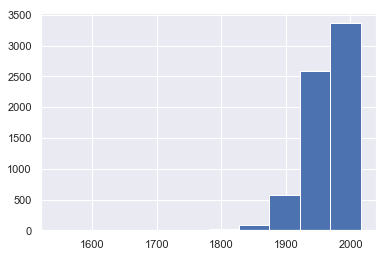

In [14]:
plt.hist(num_feat['Date_of_Occupancy'])
plt.show()

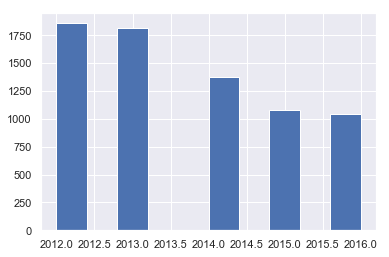

In [15]:
plt.hist(num_feat['YearOfObservation'])
plt.show()

In [16]:
num_feat.isna().sum() / len(num_feat)

YearOfObservation     0.000000
Insured_Period        0.000000
Residential           0.000000
Building Dimension    0.014804
Building_Type         0.000000
Date_of_Occupancy     0.070950
Claim                 0.000000
dtype: float64

In [19]:
DoO_mode = num_feat['Date_of_Occupancy'].mode()

In [20]:
num_feat['Date_of_Occupancy'] = np.where(num_feat['Date_of_Occupancy'].isnull(),DoO_mode, num_feat['Date_of_Occupancy'].values )

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
num_feat.isna().sum() / len(num_feat)

YearOfObservation     0.000000
Insured_Period        0.000000
Residential           0.000000
Building Dimension    0.014804
Building_Type         0.000000
Date_of_Occupancy     0.000000
Claim                 0.000000
dtype: float64

In [22]:
BD_mode = num_feat['Building Dimension'].mode()
BD_mode

0    400.0
dtype: float64

In [23]:
num_feat['Building Dimension'] = np.where(num_feat['Building Dimension'].isnull(),BD_mode, num_feat['Building Dimension'].values )

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
num_feat.isna().sum() / len(num_feat)

YearOfObservation     0.0
Insured_Period        0.0
Residential           0.0
Building Dimension    0.0
Building_Type         0.0
Date_of_Occupancy     0.0
Claim                 0.0
dtype: float64

In [25]:
num_feat.reset_index(drop = True, inplace = True)
cat_feat.reset_index(drop = True, inplace = True)

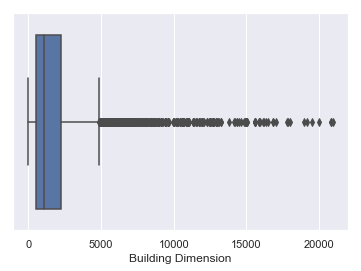

In [26]:
sns.boxplot(x=num_feat['Building Dimension'])

In [29]:
data_dummy = pd.get_dummies(cat_feat[['Building_Painted', 'Building_Fenced','Garden', 'Settlement']])
data_dummy.head()

,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_0,Garden_O,Garden_V,Settlement_R,Settlement_U
0,1,0,0,1,0,0,1,0,1
1,0,1,1,0,0,1,0,1,0
2,1,0,0,1,0,0,1,0,1
3,0,1,0,1,0,0,1,0,1
4,0,1,1,0,0,1,0,1,0


In [30]:
data_dummy.reset_index(drop = True, inplace = True)

In [31]:
drop_cat = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']
cat_feat.drop(drop_cat, inplace = True, axis = 1)

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
cat_feat.head()

,Customer Id,NumberOfWindows,Geo_Code
0,H14663,.,1053
1,H2037,4,1053
2,H3802,.,1053
3,H3834,.,1053
4,H5053,3,1053


In [33]:
df = pd.concat([data_dummy, cat_feat, num_feat], axis = 1)
df.head()

,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_0,Garden_O,Garden_V,Settlement_R,Settlement_U,Customer Id,NumberOfWindows,Geo_Code,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,1,0,0,1,0,0,1,0,1,H14663,.,1053,2013,1.0,0,290.0,1,1960.0,0
1,0,1,1,0,0,1,0,1,0,H2037,4,1053,2015,1.0,0,490.0,1,1850.0,0
2,1,0,0,1,0,0,1,0,1,H3802,.,1053,2014,1.0,0,595.0,1,1960.0,0
3,0,1,0,1,0,0,1,0,1,H3834,.,1053,2013,1.0,0,2840.0,1,1960.0,0
4,0,1,1,0,0,1,0,1,0,H5053,3,1053,2014,1.0,0,680.0,1,1800.0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 19 columns):
Building_Painted_N    7160 non-null uint8
Building_Painted_V    7160 non-null uint8
Building_Fenced_N     7160 non-null uint8
Building_Fenced_V     7160 non-null uint8
Garden_0              7160 non-null uint8
Garden_O              7160 non-null uint8
Garden_V              7160 non-null uint8
Settlement_R          7160 non-null uint8
Settlement_U          7160 non-null uint8
Customer Id           7160 non-null object
NumberOfWindows       7160 non-null object
Geo_Code              7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     7160 non-null float64
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(3), uint8(9)
memory usage: 622.4+ KB


In [42]:
df['NumberOfWindows'] = np.where(df['NumberOfWindows'].isna(), 0, df['NumberOfWindows'].values )
df['Geo_Code'] = np.where(df['Geo_Code'].isna(), 0, df['Geo_Code'].values )

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 19 columns):
Building_Painted_N    7160 non-null uint8
Building_Painted_V    7160 non-null uint8
Building_Fenced_N     7160 non-null uint8
Building_Fenced_V     7160 non-null uint8
Garden_0              7160 non-null uint8
Garden_O              7160 non-null uint8
Garden_V              7160 non-null uint8
Settlement_R          7160 non-null uint8
Settlement_U          7160 non-null uint8
Customer Id           7160 non-null object
NumberOfWindows       7160 non-null object
Geo_Code              7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     7160 non-null float64
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(3), uint8(9)
memory usage: 622.4+ KB


In [63]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
mms = MinMaxScaler()
le = LabelEncoder()
df['YearOfObservation'] = mms.fit_transform(np.array(df['YearOfObservation']).reshape(-1,1))
df['Building Dimension'] = mms.fit_transform(np.array(df['Building Dimension']).reshape(-1,1))
df['NumberOfWindows'] = le.fit_transform(np.array(df['NumberOfWindows']).reshape(-1,1))
df['Geo_Code'] = df['Geo_Code'].map({'<': ''})
df['Geo_Code'] = le.fit_transform(df['Geo_Code'])

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score,  recall_score,  accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



X = df.drop(['Claim', 'Customer Id'], axis = 1)
y = df['Claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X,y)

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [77]:
rfc.score(X,y)

0.96731843575419

In [79]:
y_train_pred = rfc.predict(X_train)
y_train_pred

y_test_pred = rfc.predict(X_test)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
print('f1 score : ', f1_score(y_test, y_test_pred))
print('Recall score : ', recall_score(y_test, y_test_pred))
print('Accuracy score : ', accuracy_score(y_test, y_test_pred))
print('precision_score : ', precision_score(y_test, y_test_pred))

f1 score :  0.9206680584551148
Recall score :  0.8647058823529412
Accuracy score :  0.9646182495344506
precision_score :  0.984375


In [82]:
from sklearn.metrics import confusion_matrix


In [83]:
url = 'C:/Users/AKINTOLA/Downloads/test_data.csv'
df_test = pd.read_csv(url)
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [84]:
cat = df_test.select_dtypes(include = ['object'])
cat.head()

,Customer Id,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Geo_Code
0,H11920,V,N,O,R,3,3310
1,H11921,V,N,O,R,3,3310
2,H9805,V,V,V,U,.,3310
3,H7493,V,N,O,R,3,3321
4,H7494,V,N,O,R,3,3321


In [85]:
cat.isna().sum() / len(cat)

Customer Id         0.000000
Building_Painted    0.000000
Building_Fenced     0.000000
Garden              0.001303
Settlement          0.000000
NumberOfWindows     0.000000
Geo_Code            0.004236
dtype: float64

In [86]:
geo_mode = cat['Geo_Code'].mode()
Garden_mode = cat['Garden'].mode()

In [87]:
cat['Geo_Code'] = np.where(cat['Geo_Code'].isnull(), 0, cat['Geo_Code'].values)
cat['Garden'] = np.where(cat['Garden'].isnull(), 0, cat['Garden'].values)

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\AKINTOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
num = df_test.select_dtypes(include = ['int64', 'float64'])
num.head()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
0,2013,1.000000,0,300.0,1,1960.0
1,2016,0.997268,0,300.0,1,1960.0
2,2013,0.369863,0,790.0,1,1960.0
3,2014,1.000000,0,1405.0,1,2004.0
4,2016,1.000000,0,1405.0,1,2004.0


In [89]:
num.isna().sum() / len(num)

YearOfObservation     0.000000
Insured_Period        0.000000
Residential           0.000000
Building Dimension    0.004236
Building_Type         0.000000
Date_of_Occupancy     0.237211
dtype: float64

In [90]:
BD = num_feat['Building Dimension'].mode()
num['Building Dimension'] = np.where(num['Building Dimension'].isnull(),BD, num['Building Dimension'].values )

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
num.isna().sum() / len(num)

YearOfObservation     0.000000
Insured_Period        0.000000
Residential           0.000000
Building Dimension    0.000000
Building_Type         0.000000
Date_of_Occupancy     0.237211
dtype: float64

In [92]:
DO = num_feat['Date_of_Occupancy'].mode()
num['Date_of_Occupancy'] = np.where(num['Date_of_Occupancy'].isnull(),DO, num['Date_of_Occupancy'].values )

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
num.isna().sum() / len(num)

YearOfObservation     0.0
Insured_Period        0.0
Residential           0.0
Building Dimension    0.0
Building_Type         0.0
Date_of_Occupancy     0.0
dtype: float64

In [94]:
dat_dummy = pd.get_dummies(cat[['Building_Painted', 'Building_Fenced','Garden', 'Settlement']])
dat_dummy.head()

,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_0,Garden_O,Garden_V,Settlement_R,Settlement_U
0,0,1,1,0,0,1,0,1,0
1,0,1,1,0,0,1,0,1,0
2,0,1,0,1,0,0,1,0,1
3,0,1,1,0,0,1,0,1,0
4,0,1,1,0,0,1,0,1,0


In [95]:
dat_dummy.reset_index(drop = True, inplace = True)

In [96]:
drop_caty = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']
cat.drop(drop_caty, inplace = True, axis = 1)

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [97]:
df_test = pd.concat([dat_dummy, cat, num], axis = 1)
df_test.head()

,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_0,Garden_O,Garden_V,Settlement_R,Settlement_U,Customer Id,NumberOfWindows,Geo_Code,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
0,0,1,1,0,0,1,0,1,0,H11920,3,3310,2013,1.000000,0,300.0,1,1960.0
1,0,1,1,0,0,1,0,1,0,H11921,3,3310,2016,0.997268,0,300.0,1,1960.0
2,0,1,0,1,0,0,1,0,1,H9805,.,3310,2013,0.369863,0,790.0,1,1960.0
3,0,1,1,0,0,1,0,1,0,H7493,3,3321,2014,1.000000,0,1405.0,1,2004.0
4,0,1,1,0,0,1,0,1,0,H7494,3,3321,2016,1.000000,0,1405.0,1,2004.0


In [99]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
mms = MinMaxScaler()
le = LabelEncoder()
df_test['YearOfObservation'] = mms.fit_transform(np.array(df_test['YearOfObservation']).reshape(-1,1))
df_test['Building Dimension'] = mms.fit_transform(np.array(df_test['Building Dimension']).reshape(-1,1))
df_test['NumberOfWindows'] = le.fit_transform(np.array(df_test['NumberOfWindows']).reshape(-1,1))
df_test['Geo_Code'] = df['Geo_Code'].map({'<': ''})
df_test['Geo_Code'] = le.fit_transform(df_test['Geo_Code'])

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
df_test.head()

,Building_Painted_N,Building_Painted_V,Building_Fenced_N,Building_Fenced_V,Garden_0,Garden_O,Garden_V,Settlement_R,Settlement_U,Customer Id,NumberOfWindows,Geo_Code,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
0,0,1,1,0,0,1,0,1,0,H11920,3,0,0.25,1.000000,0,0.009725,1,1960.0
1,0,1,1,0,0,1,0,1,0,H11921,3,0,1.00,0.997268,0,0.009725,1,1960.0
2,0,1,0,1,0,0,1,0,1,H9805,0,0,0.25,0.369863,0,0.025664,1,1960.0
3,0,1,1,0,0,1,0,1,0,H7493,3,0,0.50,1.000000,0,0.045667,1,2004.0
4,0,1,1,0,0,1,0,1,0,H7494,3,0,1.00,1.000000,0,0.045667,1,2004.0


In [102]:
ID = df_test['Customer Id']
df_test.drop('Customer Id', inplace = True, axis = 1)

In [107]:
claims = rfc.predict(df_test)

In [109]:
Submission_df = pd.DataFrame({
        'Customer Id':ID,
        'Claim': claims
        })

Submission_df.shape

(3069, 2)

In [110]:
Submission_df.to_csv('Submission_df.csv', index = False)